# Matrix Factorization

In this task you are supposed to (manually) implement the matrix factorization variant you learned in the Data Cleaning chapter using the `numpy` library.

In [139]:
import numpy as np
import matplotlib.pyplot as plt

We continue the scenario from the tutorials.

Assume that you have a ginormous database $D$ of three users and three movies and ratings provided by some users to some movies, which we represent as a matrix, where the entry $D_{ij}$ represents the rating user $i$ gave to movie $j$.
Since not all users have rated movies, and the rating ranges from 1 to 5, we encode missing ratings as 0.

In [140]:
# missing values encoded as 0
# 3x3 Matrix
D = [
     [3,1,0],
     [1,0,3],
     [0,3,5],
    ]
D = np.array(D)
n_users = D.shape[0]
n_movies = D.shape[1]

First, randomly initialize the two factors $E$ and $A$ for $f=2$ latent features. For evaluating the correctness of your results from the tutorial, you may *additionally* provide hard-coded inital factors as they have been provided in the tutorial.

d
 [[ 0.03254145  0.00272293 -0.00703853]
 [ 0.00740055  0.00293674 -0.00011683]
 [-0.00656105  0.00689911  0.00618806]]


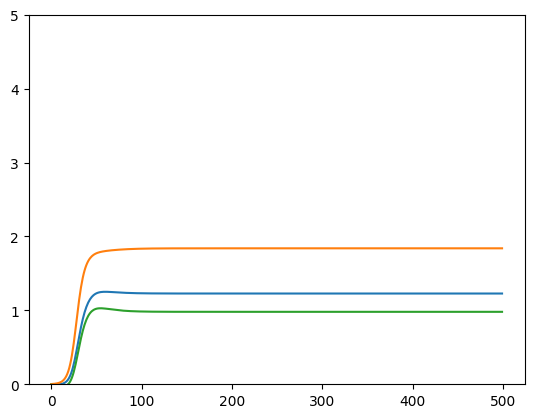

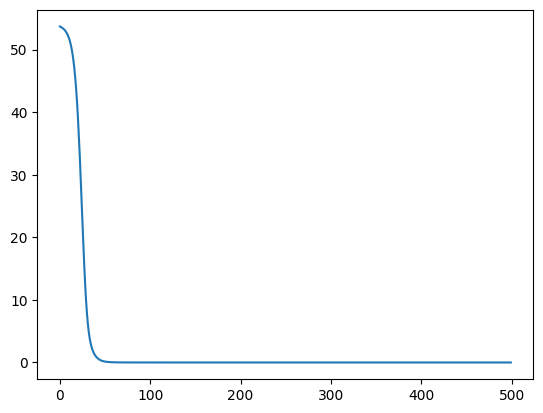

(array([[3.        , 1.        , 1.22775087],
        [1.        , 1.83931221, 3.        ],
        [0.98015777, 3.        , 5.        ]]),
 array([[3, 1, 0],
        [1, 0, 3],
        [0, 3, 5]]))

In [199]:
lr = 0.01
epochs = 500
f = 2
# Random matrix E is N*f, so 3x3
E = np.random.normal(0, .1, (n_users,f))
# E = np.array([[0.34, 0.67], [0.38, 0.93], [0.21, 0.39]])

#Random matrix A is f*M, so 3x3
A = np.random.normal(0, .1, (f,n_movies))
# A = np.array([[0.45, 0.78, 0.37], [0.02, 0.67, 0.35]])
masks_zeros = (D == 0)
track1 = []
track2 = []
track3 = []
sqrt_err = []

# d = E @ A
# print("d\n", d)
for i in range(epochs):
    d = E @ A

    #track unknown values
    track1.append(d[0,2])
    track2.append(d[1,1])
    track3.append(d[2,0])
    # print("D\n", D)
    # print("d\n", d)
    # print("E\n", E)
    # print("D\n", D)

    # compute error and remove unknown values
    diff = 2 * (D - d)
    diff[masks_zeros] = D[masks_zeros]
    # print("diff masked\n", diff)

    # track squared error    
    err = np.sum(((D - d) * (1-masks_zeros))**2)
    sqrt_err.append(err)

    # use matrix mul to compute all errors at once
    e_errors = diff @ A.T
    a_errors = E.T @ diff

    # print("e_err\n", e_errors)
    # print("a_err\n", a_errors)

    # update E and A all at once
    E = E + (e_errors * lr)
    A = A + (a_errors * lr)
    


plt.plot(track1)
plt.plot(track2)
plt.plot(track3)
plt.ylim(0,5)
plt.show()
plt.plot(sqrt_err)
plt.show()

d,D

Implement a function that takes the data matrix $D$, the inital factors $E, A$, the number of epochs (iterations), the learning rate $\eta$, and performs the factorization of $D$. Use a default number of 5000 for the epochs and 0.001 for $\eta$.

Updates to $E$ and $A$ are applied immediately. $\tilde{D}$ is updated after an entry from D was completely dealt with. Update ordered by latent features and E before A.

[[3.         1.         1.57141642]
 [1.         1.81127769 3.        ]
 [0.75838461 3.         5.        ]]
[[3 1 0]
 [1 0 3]
 [0 3 5]]


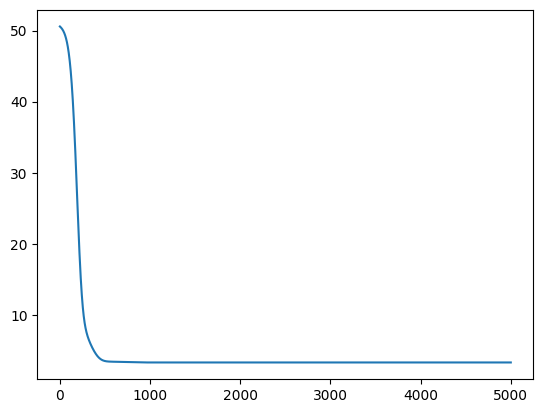

In [236]:

D = [
     [3,1,0],
     [1,0,3],
     [0,3,5],
    ]
D = np.array(D)
n_e, n_a = D.shape
E = np.random.normal(0, .1, (n_users,f))
A = np.random.normal(0, .1, (f,n_movies))


def cmpt(matrixD, facE, facA, iter = 5000, rate = 0.001):
    f = facE.shape[1]
    n_e, n_a = matrixD.shape
    masks_zeros = (matrixD == 0)
    
    sqrt_errs = []
    
    for it in range(iter):
        d = E @ A
        diff_2 = 2 * (D -d)
        
        # update E and A
        for i in range(n_a):
            for j in range(n_e):
                # print(f"d[{i}][{j}]")
                # if D == 0 skip because no value
                if D[i,j] == 0: 
                    continue
                for k in range(f):
                    # print(f"\tE[{i}][{k}] <> A[{k}][{j}]")
                    # update E before A
                    E[i,k] = E[i,k] + rate * (diff_2[i,j] * facA[k, j])
                    A[k,j] = A[k,j] + rate * (diff_2[i,j] * facE[i,k])
                # update d after processing one entry of D
                d = E@A

        # log squared error        
        se = np.sum(((D-d)**2) * 1 - masks_zeros)
        sqrt_errs.append(se)
        
    print(E@A)
    print(D)
    plt.plot(sqrt_errs)
    plt.show()
cmpt(D, E, A)            
    
    

Now test your matrix factorization for the parameters sepcified above.

In [67]:
# TODO your code goes here